# LTFS EDA

In [13]:
import re # обработка признаков
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
train_df = pd.read_csv("data/train.csv")
# test_df = pd.read_csv("data/test.csv")
data_dict = pd.read_excel("data/data_dict.xlsx")

In [3]:
train_df.shape

(233154, 41)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


In [6]:
sample = pd.DataFrame(train_df.sample(5).T).reset_index()
sample.rename(columns = {'index':'Variable Name'}, inplace=True)
sample_desc = data_dict[['Variable Name','Description_ru']].merge(sample, how='left', on='Variable Name')

In [7]:
sample_desc

,Variable Name,Description_ru,178200,144024,112607,133056,80603
0,UniqueID,ID заемщика,486222,513271,525506,478330,583442
1,loan_default,Просрочка первого ежемесячного платежа,0,0,0,0,0
2,disbursed_amount,Сумма выданного кредита,50518,62800,58241,49178,63613
3,asset_cost,Стоимость авто,59184,67558,69680,60219,84500
4,ltv,Отношение суммы кредита к стоимости авто,87.86,94.73,85.0,84.86,76.21
5,branch_id,"ID филиала, где выдали займ",249,15,67,259,2
6,supplier_id,ID дилера выдавшего займ,22907,14336,21308,21909,14770
7,manufacturer_id,ID марки авто,86,86,86,86,120
8,Current_pincode_ID,Пинкод? заемщика,2231,298,1508,228,1609
9,Date.of.Birth,Дата рождения заемщика,16-08-78,09-09-75,26-02-86,16-11-94,10-03-78


## Разделение признаков

Подсчет количества уникальных значений для каждого признака

In [8]:
# Для каждого признака выводится количество уникальных значений
print('\033[36m*' * 50 + '\033[0m')
for each_column in train_df.columns:
    each_column_nunique = train_df[each_column].nunique()
    print(f"Признак: [{each_column}] Кол-во уникальных: {each_column_nunique}\n")

    # Если категорий меньше трех, то выводим их все 
    if each_column_nunique <= 3:
        print(sorted(train_df[each_column].value_counts().to_dict().items()),'\n')
    print('\033[36m*' * 50 +'\033[0m')

**************************************************
Признак: [UniqueID] Кол-во уникальных: 233154

**************************************************
Признак: [disbursed_amount] Кол-во уникальных: 24565

**************************************************
Признак: [asset_cost] Кол-во уникальных: 46252

**************************************************
Признак: [ltv] Кол-во уникальных: 6579

**************************************************
Признак: [branch_id] Кол-во уникальных: 82

**************************************************
Признак: [supplier_id] Кол-во уникальных: 2953

**************************************************
Признак: [manufacturer_id] Кол-во уникальных: 11

**************************************************
Признак: [Current_pincode_ID] Кол-во уникальных: 6698

**************************************************
Признак: [Date.of.Birth] Кол-во уникальных: 15433

**************************************************
Признак: [Employment.Type] Кол-во уникальных: 2

[('S

limit_output extension: Maximum message size of 15000 exceeded with 15162 characters

Признак MobileNo_Avl_Flag для всех заемщиков в датасете равен 1

Делим признаки на 4 типа:
* Категориальные
* Числовые
* Даты
* ID

In [9]:
target_feature = ['loan_default']

categorical_features = ['Employment.Type', 'PERFORM_CNS.SCORE.DESCRIPTION', \
                        'manufacturer_id', 'State_ID', 'MobileNo_Avl_Flag', \
                        'Aadhar_flag', 'PAN_flag', 'VoterID_flag', \
                        'Driving_flag', 'Passport_flag']

date_features = ['Date.of.Birth', 'DisbursalDate', 'CREDIT.HISTORY.LENGTH', \
                 'AVERAGE.ACCT.AGE']

id_features = ['UniqueID', 'branch_id', 'supplier_id', \
               'Current_pincode_ID', 'Employee_code_ID']

notnum_features = categorical_features + date_features + id_features + target_feature
num_features = [col for col in train_df.columns if col not in notnum_features]

## Признаки с датами

In [28]:
df = train_df.copy()
train_df[date_features].head(10)

,Date.of.Birth,DisbursalDate,CREDIT.HISTORY.LENGTH,AVERAGE.ACCT.AGE
0,01-01-84,03-08-18,0yrs 0mon,0yrs 0mon
1,31-07-85,26-09-18,1yrs 11mon,1yrs 11mon
2,24-08-85,01-08-18,0yrs 0mon,0yrs 0mon
3,30-12-93,26-10-18,1yrs 3mon,0yrs 8mon
4,09-12-77,26-09-18,0yrs 0mon,0yrs 0mon
5,08-09-90,19-09-18,2yrs 0mon,1yrs 9mon
6,01-06-88,23-09-18,0yrs 0mon,0yrs 0mon
7,04-10-89,16-09-18,0yrs 2mon,0yrs 2mon
8,15-11-91,05-09-18,4yrs 8mon,4yrs 8mon
9,01-06-68,16-09-18,1yrs 7mon,1yrs 7mon


Конвертируем дату рождения и дату выдачи из object в datetime

In [29]:
df['Date.of.Birth'] = pd.to_datetime(train_df['Date.of.Birth'], format='%d-%m-%y')
df['DisbursalDate'] = pd.to_datetime(train_df['DisbursalDate'], format='%d-%m-%y')
df[['Date.of.Birth', 'DisbursalDate']].head(10)

,Date.of.Birth,DisbursalDate
0,1984-01-01,2018-08-03
1,1985-07-31,2018-09-26
2,1985-08-24,2018-08-01
3,1993-12-30,2018-10-26
4,1977-12-09,2018-09-26
5,1990-09-08,2018-09-19
6,1988-06-01,2018-09-23
7,1989-10-04,2018-09-16
8,1991-11-15,2018-09-05
9,2068-06-01,2018-09-16


Найдем возраст заемщика на момент выдачи кредита

In [63]:
# Корректировки неправильно распознанных дат из-за двух символов для обозначения года
future = df['Date.of.Birth'] > max(df['DisbursalDate'])
df.loc[future, 'Date.of.Birth'] -= np.timedelta64(100, 'Y')

df['Age'] = ((df['DisbursalDate'] - df['Date.of.Birth']) / np.timedelta64(1, 'Y')).apply(lambda x: int(x))
df = df.drop(['Date.of.Birth'], axis=1)

Для полей "Длина кредитной истории" и "Средний срок кредита" из '_yrs_mon' находим количество месяцев

In [21]:
def get_month_cnt(string):
    digits = re.findall(r'(\d+)', string=string)
    yrs = int(digits[0])
    mon = int(digits[1])
    return (yrs * 12) + mon

In [49]:
df['CREDIT.HISTORY.LENGTH'] = train_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: get_month_cnt(x))
df['AVERAGE.ACCT.AGE'] = train_df['AVERAGE.ACCT.AGE'].apply(lambda x: get_month_cnt(x))
df[['CREDIT.HISTORY.LENGTH', 'AVERAGE.ACCT.AGE']].head(10)

,CREDIT.HISTORY.LENGTH,AVERAGE.ACCT.AGE
0,0,0
1,23,23
2,0,0
3,15,8
4,0,0
5,24,21
6,0,0
7,2,2
8,56,56
9,19,19


## Категориальные признаки

In [23]:
train_df[categorical_features].head()

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION,manufacturer_id,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag
0,Salaried,No Bureau History Available,45,6,1,1,0,0,0,0
1,Self employed,I-Medium Risk,45,6,1,1,0,0,0,0
2,Self employed,No Bureau History Available,45,6,1,1,0,0,0,0
3,Self employed,L-Very High Risk,45,6,1,1,0,0,0,0
4,Self employed,No Bureau History Available,45,6,1,1,0,0,0,0


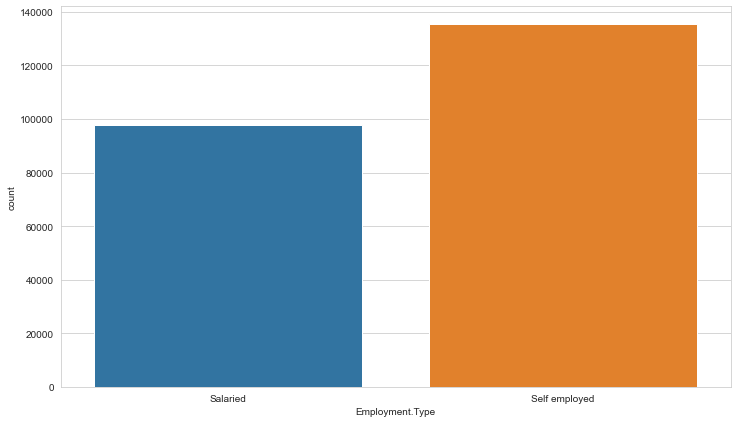

In [54]:
plt.figure(figsize=(12, 7))

with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    sns.countplot(data=df, x='Employment.Type')
    plt.show()

Заполним пропуски в поле "Тип занятости" значением 'Self employed'

In [53]:
df['Employment.Type'] = train_df['Employment.Type'].fillna('Self employed')

In [64]:
df['is_salaried'] = pd.get_dummies(data=df['Employment.Type'])['Salaried']
df = df.drop(['Employment.Type'], axis=1)

In [62]:
train_df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

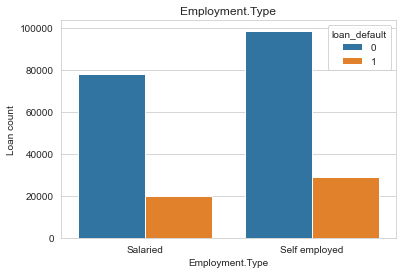

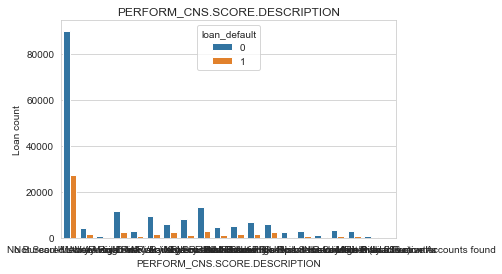

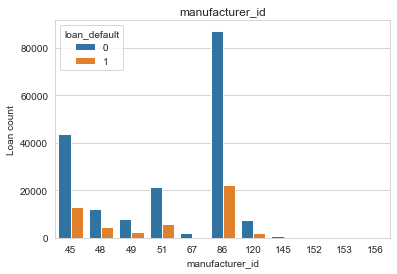

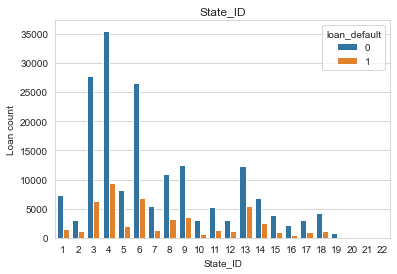

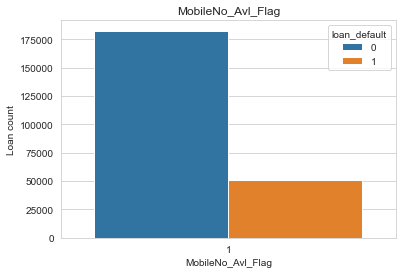

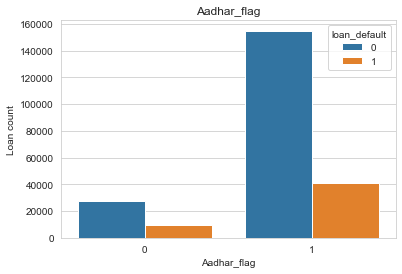

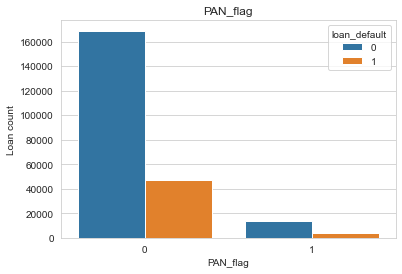

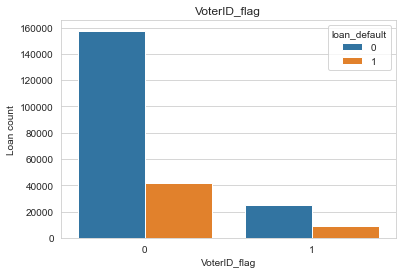

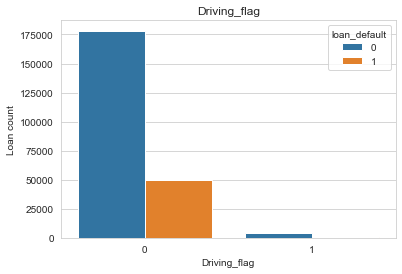

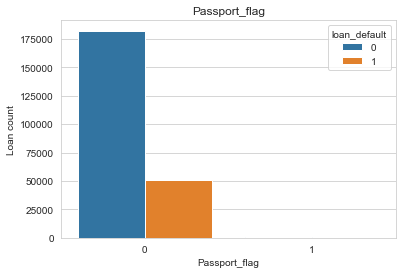

In [10]:
for feature in categorical_features:
    data = train_df.copy()
    sns.countplot(data=data, x=feature, hue='loan_default')
    plt.xlabel(feature)
    plt.ylabel('Loan count')
    plt.title(feature)
    plt.show()

In [11]:
num_df = train_df[num_features]
target = train_df['loan_default']